# PbS 900 su TEMPERATURA: FIT VARSHNI

## Importazioni

In [15]:
from qp2_subroutines import *
import os
os.getcwd() 

'/Users/zosojack/lab-ss/QP2'

In [16]:
# per importare da sibling folder
import sys
sys.path.append("../QM2")
from varshni_subroutines import lambda_to_E, err_lambda_to_E

In [17]:
from extracted_data.PbS_rampa_T_peaks import PbS_T_peaks

In [18]:
arr_T = ['90', '100', '110', '120', '130', '140', '150', '160', '170', '180',
        '190', '200', '210', '220', '240', '250', '265', '300'] # + 'K'

---

---

## PLOT DI PICCHI, FWHM E INTENSITÀ

In [19]:
int_T = [int(x) for x in arr_T]
x = np.array(int_T)
mu1 = []
mu2 = []
a1 = []
a2 = []
sigma1 = []
sigma2 = []

In [20]:
# Assemblo i vettori per il plot
for T in arr_T:
    if PbS_T_peaks[T][0][1] > PbS_T_peaks[T][1][1]:
        mu1.append(PbS_T_peaks[T][0][1])
        mu2.append(PbS_T_peaks[T][1][1])
        a1.append(PbS_T_peaks[T][0][0])
        a2.append(PbS_T_peaks[T][1][0])
        sigma1.append(PbS_T_peaks[T][0][2])
        sigma2.append(PbS_T_peaks[T][1][2])
    else: 
        mu1.append(PbS_T_peaks[T][1][1])
        mu2.append(PbS_T_peaks[T][0][1])
        a1.append(PbS_T_peaks[T][1][0])
        a2.append(PbS_T_peaks[T][0][0])
        sigma1.append(PbS_T_peaks[T][1][2])
        sigma2.append(PbS_T_peaks[T][0][2])

---

## $\mu$ su T + Varshni

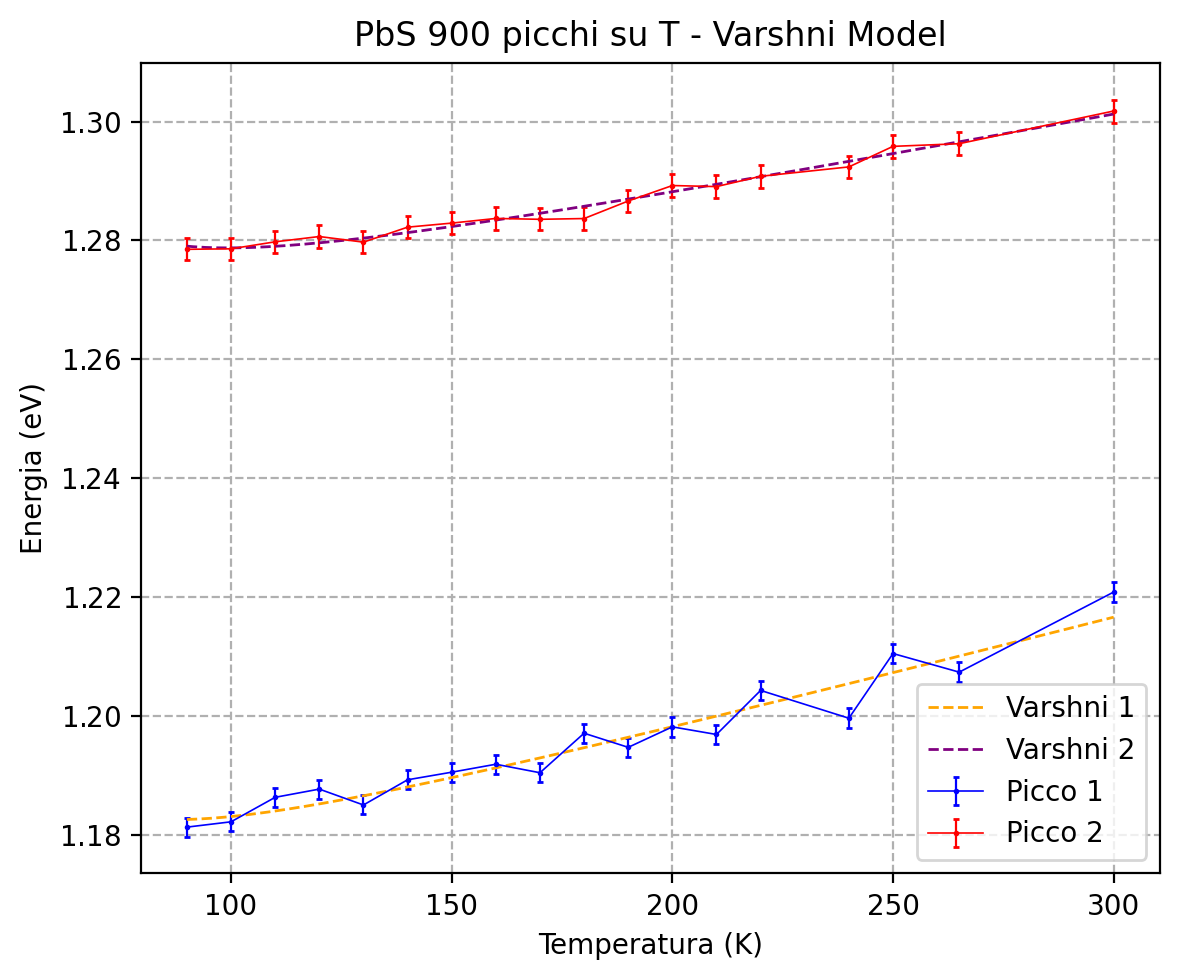

• Varshni 1
 - $E_0$ = 1.1485079009989025
 - $\alpha$ = -0.0001937497264759214
 - $\beta$ = -43.92424304363334
 - chi2rid = 2.9345149292326465
• Varshni 2
 - $E_0$ = 1.2509662324674224
 - $\alpha$ = -0.00013990441931558008
 - $\beta$ = -49.61790392060021
 - chi2rid = 0.24425284505309972


In [21]:
## PLOT ##

plt.figure(figsize=(6,5), dpi=200)
# serve errorbar 
err_mu = 1.4145357031249999
err_mu1, err_mu2 = err_mu, err_mu

# c'è da convertire!!!
err_mu1, err_mu2 = err_lambda_to_E(mu1, err_mu), err_lambda_to_E(mu2, err_mu)
mu1_ev, mu2_ev = lambda_to_E(mu1), lambda_to_E(mu2)


plt.errorbar(x, mu1_ev, yerr=err_mu1, linestyle='-', marker='o', markersize=1, elinewidth=0.8, capsize=1,
             color='b', label='Picco 1', linewidth=0.6)
plt.errorbar(x, mu2_ev, yerr=err_mu2, linestyle='-', marker='o', markersize=1, elinewidth=0.8, capsize=1,
             color='r', label='Picco 2', linewidth=0.6)

## VARSHNI ##
p0 = [0.1, 0.1, 0.1]
low = [-np.inf, -np.inf, -np.inf]
upp = [np.inf, np.inf, np.inf]
popt1, pcov1 = curve_fit(varshni, x, mu1_ev, sigma=err_mu1, p0=p0, bounds=(low,upp))
popt2, pcov2 = curve_fit(varshni, x, mu2_ev, sigma=err_mu2, p0=p0, bounds=(low,upp))

## EXPONENTIAL GROWTH MODEL ## 
'''
popt1, pcov1 = curve_fit(exp_growth_model, x, mu1_ev, sigma=err_mu1, p0=p0, bounds=(low,upp))
popt2, pcov2 = curve_fit(exp_growth_model, x, mu2_ev, sigma=err_mu2, p0=p0, bounds=(low,upp))
'''

## PLOT CURVA FIT ##
x_plot = np.linspace(90, 300, 150)
y_plot1 = varshni(x_plot, *popt1)
plt.plot(x_plot, y_plot1, linestyle='--', color='orange', label=f"Varshni 1", linewidth=1)#, zorder=2)
y_plot2 = varshni(x_plot, *popt2)
plt.plot(x_plot, y_plot2, linestyle='--', color='purple', label=f"Varshni 2", linewidth=1)#, zorder=2)

## OPZIONI GRAFICHE ##
plt.title(r'PbS 900 picchi su T - Varshni Model')
plt.xlabel("Temperatura (K)")
#plt.ylabel("Picco (nm)")
plt.ylabel("Energia (eV)")
plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
plt.legend()
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

## CHI2 ##
chi2_1, dof_1 = chi2_varshni (x, mu1_ev, err_y=err_mu1, popt=popt1)
chi2_2, dof_2 = chi2_varshni (x, mu2_ev, err_y=err_mu2, popt=popt2)

## PRINT RISULTATI FIT ##
print('• Varshni 1')
print(r' - $E_0$ =', popt1[0])
print(r' - $\alpha$ =', popt1[1])
print(r' - $\beta$ =', popt1[2])
print(' - chi2rid =', chi2_1/dof_1)
print('• Varshni 2')
print(r' - $E_0$ =', popt2[0])
print(r' - $\alpha$ =', popt2[1])
print(r' - $\beta$ =', popt2[2])
print(' - chi2rid =', chi2_2/dof_2)

---

## FWHM su T

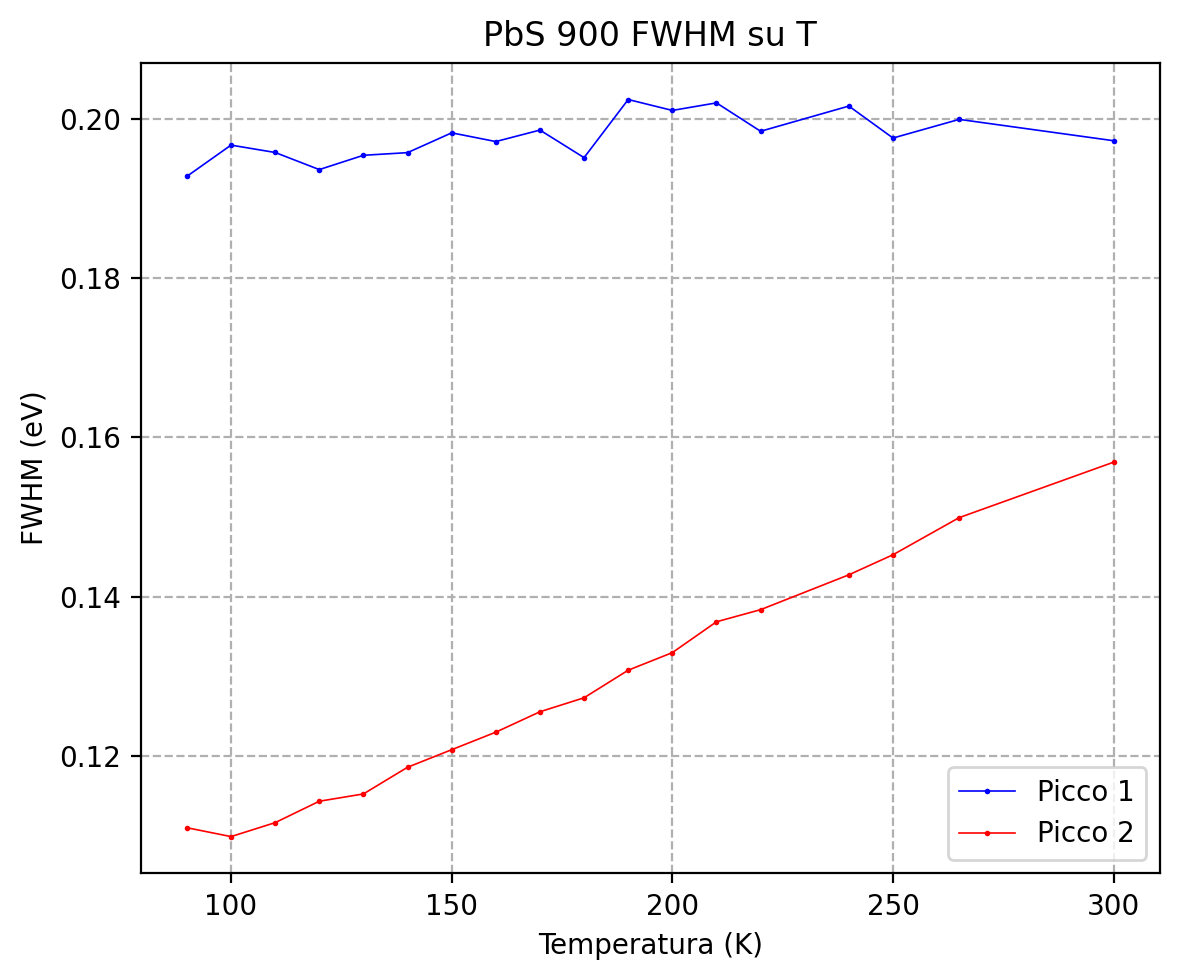

In [22]:
## PLOT ##

plt.figure(figsize=(6,5), dpi=200)

# c'è da convertire!!!
sigma1_ev, sigma2_ev = err_lambda_to_E(mu1, sigma1), err_lambda_to_E(mu2, sigma2)

fwhm1 = 2.633 * sigma1_ev
fwhm2 = 2.633 * sigma2_ev

plt.errorbar(x, fwhm1, linestyle='-', marker='o', markersize=1, elinewidth=0.8, capsize=1,
             color='b', label='Picco 1', linewidth=0.6)
plt.errorbar(x, fwhm2, linestyle='-', marker='o', markersize=1, elinewidth=0.8, capsize=1,
             color='r', label='Picco 2', linewidth=0.6)

## OPZIONI GRAFICHE ##
plt.title(r'PbS 900 FWHM su T')
plt.xlabel("Temperatura (K)")
#plt.ylabel("FWHM (nm)")
plt.ylabel("FWHM (eV)")
#plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
plt.legend()
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

---

## Intensità integrata su T

height ∗ sigma ∗ 2 π

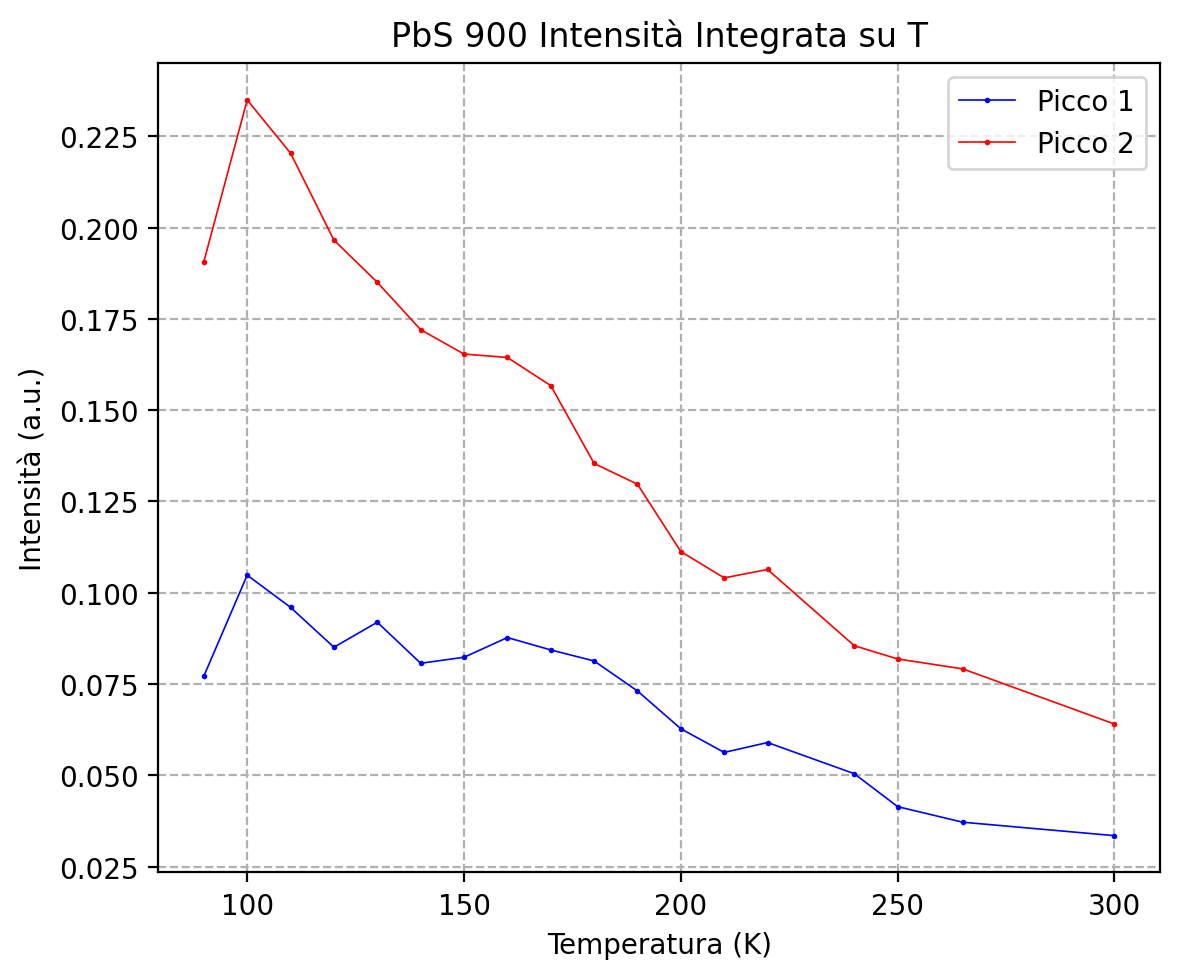

In [23]:
## PLOT ##

plt.figure(figsize=(6,5), dpi=200)

intensità1 = np.array(a1) * np.array(sigma1_ev) * 2 * np.pi
intensità2 = np.array(a2) * np.array(sigma2_ev) * 2 * np.pi

plt.errorbar(x, intensità1, linestyle='-', marker='o', markersize=1, elinewidth=0.8, capsize=1,
             color='b', label='Picco 1', linewidth=0.6)
plt.errorbar(x, intensità2, linestyle='-', marker='o', markersize=1, elinewidth=0.8, capsize=1,
             color='r', label='Picco 2', linewidth=0.6)

## OPZIONI GRAFICHE ##
plt.title(r'PbS 900 Intensità Integrata su T')
plt.xlabel("Temperatura (K)")
#plt.ylabel("Intensità (nm^2)")
plt.ylabel("Intensità (a.u.)")
#plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
plt.legend()
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

---

---

# Gaussiane 

---

## Picco alto

T=100: x_label=1.202172807437521, y_label=0.22331357701741578
T=300: x_label=1.220828276148728, y_label=0.05115665545487039


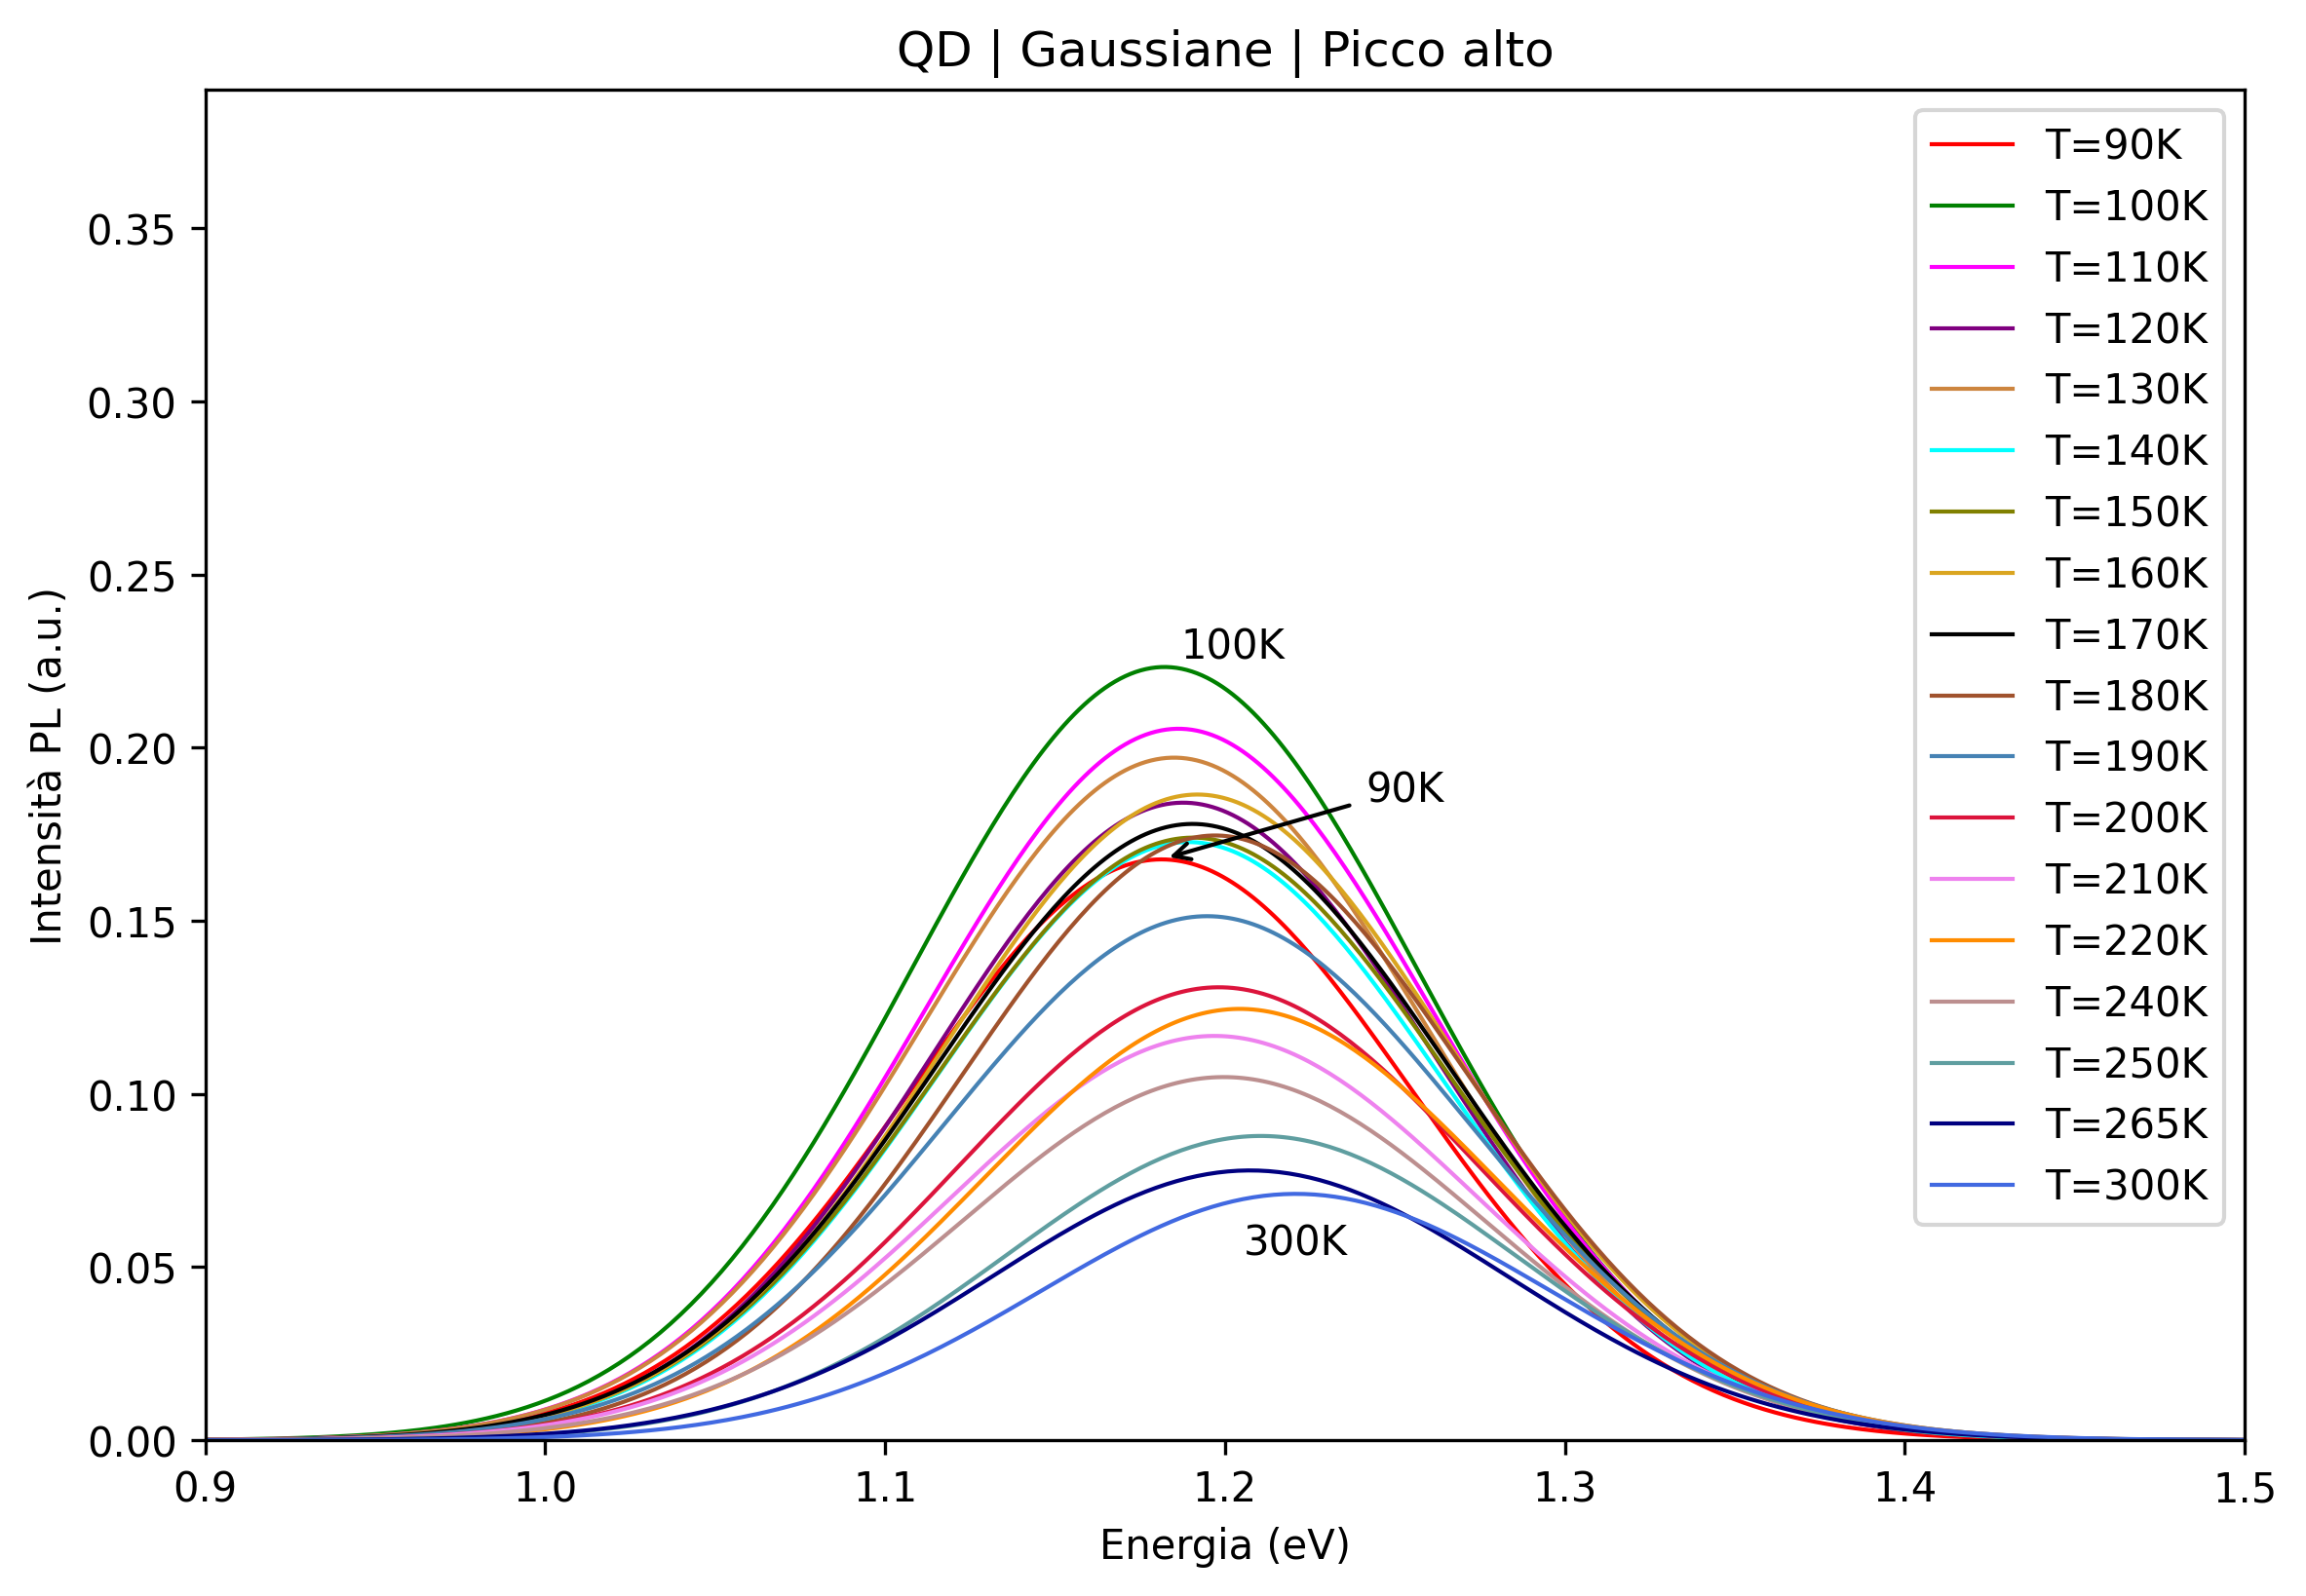

In [24]:
plt.figure(figsize=(9, 6), dpi=300)
i = 0

for mu, A, sigma in zip(mu1_ev, a1, sigma1_ev):
    x_plot = np.linspace(0.9, 1.50, 400)
    y_gauss = gaussiana(x_plot, A, mu, sigma)
    
    plt.plot(x_plot, y_gauss, linestyle='-', color=col[i], linewidth=1, label='T='+str(arr_T[i])+'K')

    # Etichette accanto alle gaussiane
    if arr_T[i] == '100':
        x_label = mu + 0.02
        y_label = gaussiana(mu, A, mu, sigma) 
        print(f"T={arr_T[i]}: x_label={x_label}, y_label={y_label}")  # Debug
        plt.text(x_label, y_label, f'{arr_T[i]}K', color='black', fontsize=10, ha='center', va='bottom')
        
    elif arr_T[i] == '300':
        x_label = mu
        y_label = gaussiana(mu, A, mu, sigma) - 0.02
        print(f"T={arr_T[i]}: x_label={x_label}, y_label={y_label}")  # Debug
        plt.text(x_label, y_label, f'{arr_T[i]}K', color='black', fontsize=10, ha='center', va='bottom')

    
    # Etichetta con freccia
    elif arr_T[i] == '90':
        plt.annotate('90K', 
                     xy=(mu, gaussiana(mu, A, mu, sigma)), 
                     xytext=(mu + 0.06, gaussiana(mu, A, mu, sigma) + 0.1 * A), 
                     arrowprops=dict(arrowstyle="->", color='black'))
    
    
    i += 1

plt.title('QD | Gaussiane | Picco alto')
plt.xlabel('Energia (eV)')
plt.ylabel('Intensità PL (a.u.)')
#plt.grid(linestyle='--')
plt.legend()
plt.xlim(0.9, 1.50)  # Forza il range visibile x
plt.ylim(0, 0.39)  # Forza il range visibile y
plt.show()

---

## Picco basso (a destra)

T=100: x_label=1.2985807946135965, y_label=0.22331357701741578
T=300: x_label=1.3017658811716717, y_label=0.05115665545487039


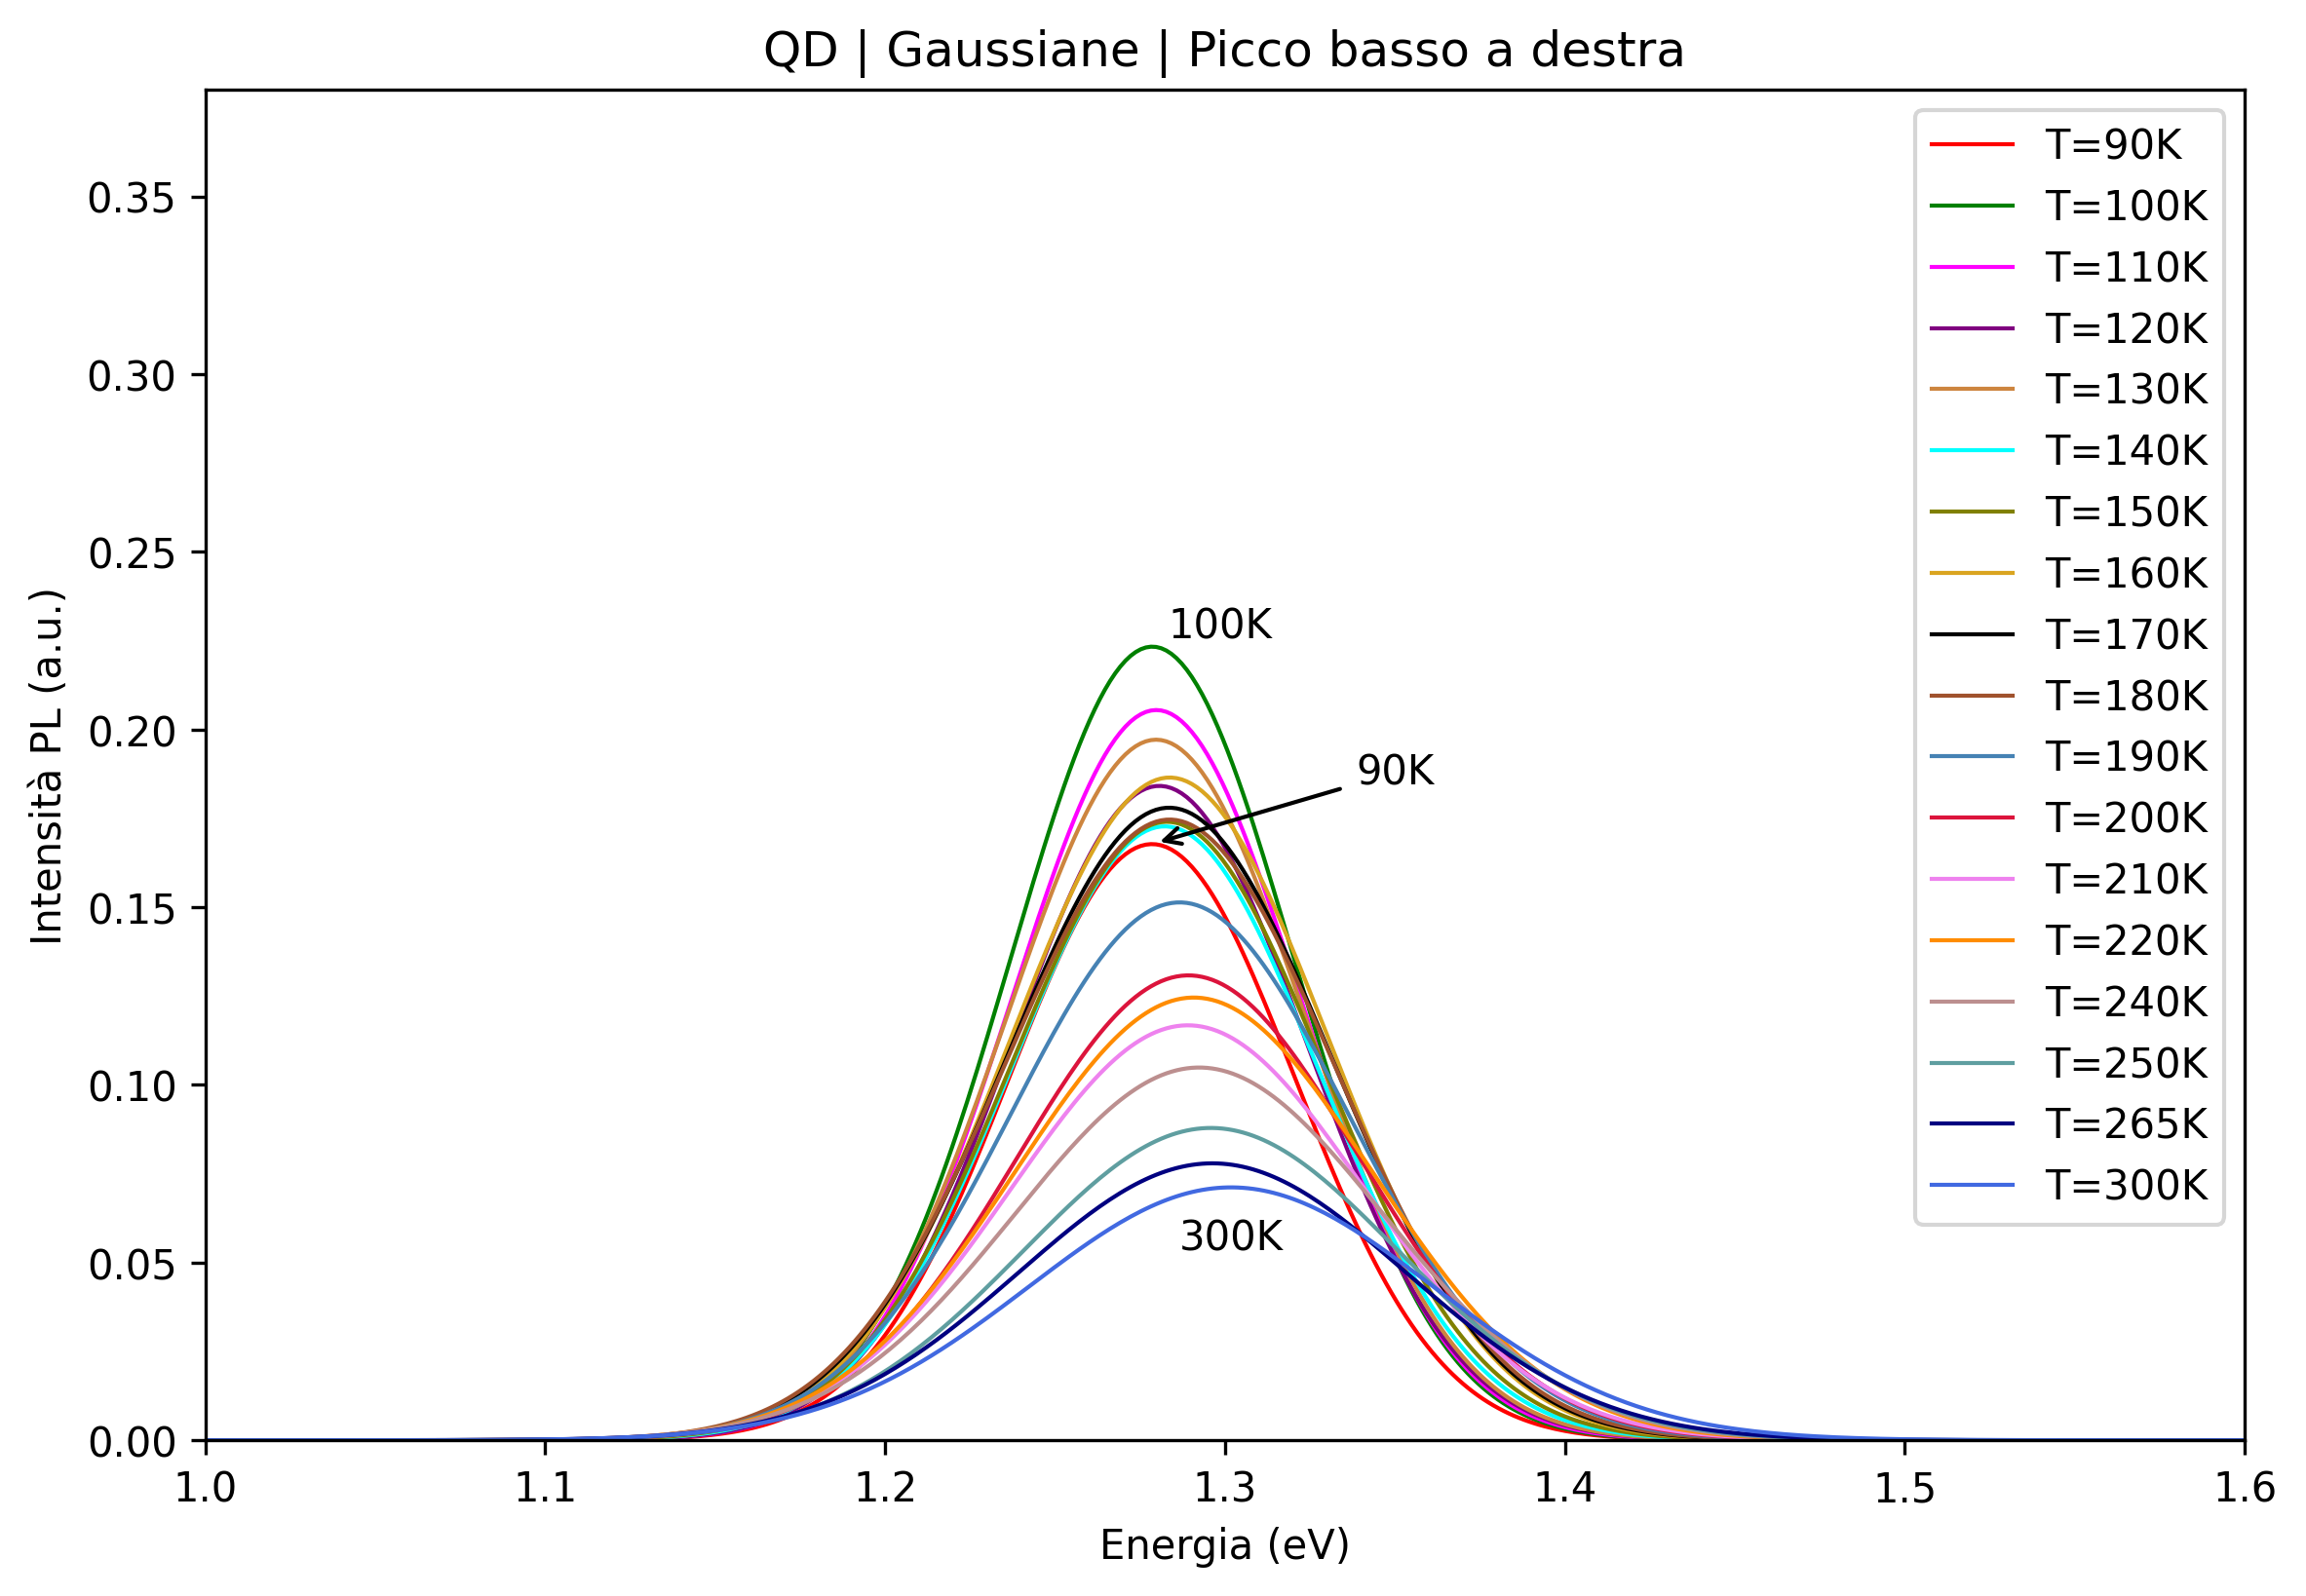

In [25]:
plt.figure(figsize=(9, 6), dpi=300)
i=0
# per ogni temperatura, estraggo sigma e a corrispondenti a ass=0 emi=1 e plotto la gaussiana 
for mu, A, sigma  in zip(mu2_ev, a1, sigma2_ev):
    
    x_plot = np.linspace(1, 1.60, 400)
    y_gauss = gaussiana(x_plot, A, mu, sigma)
    
    plt.plot(x_plot, y_gauss, linestyle='-', color=col[i], linewidth=1, label='T='+str(arr_T[i])+'K')
    
    # Etichette accanto alle gaussiane
    if arr_T[i] == '100':
        x_label = mu + 0.02
        y_label = gaussiana(mu, A, mu, sigma) 
        print(f"T={arr_T[i]}: x_label={x_label}, y_label={y_label}")  # Debug
        plt.text(x_label, y_label, f'{arr_T[i]}K', color='black', fontsize=10, ha='center', va='bottom')
        
    elif arr_T[i] == '300':
        x_label = mu
        y_label = gaussiana(mu, A, mu, sigma) - 0.02
        print(f"T={arr_T[i]}: x_label={x_label}, y_label={y_label}")  # Debug
        plt.text(x_label, y_label, f'{arr_T[i]}K', color='black', fontsize=10, ha='center', va='bottom')
        
    # Etichetta con freccia
    elif arr_T[i] == '90':
        plt.annotate('90K', 
                     xy=(mu, gaussiana(mu, A, mu, sigma)), 
                     xytext=(mu + 0.06, gaussiana(mu, A, mu, sigma) + 0.1 * A), 
                     arrowprops=dict(arrowstyle="->", color='black'))
    
    i+=1
    
# Aggiungere etichette e legenda
plt.title('QD | Gaussiane | Picco basso a destra')
plt.xlabel('Energia (eV)')
plt.ylabel('Intensità PL (a.u.)')
#plt.grid(linestyle='--')
plt.legend()
plt.xlim(1, 1.60)  # Forza il range visibile x
plt.ylim(0, 0.38)  # Forza il range visibile y
# Mostrare il grafico
plt.show()

---

# PROVO O'Donnell

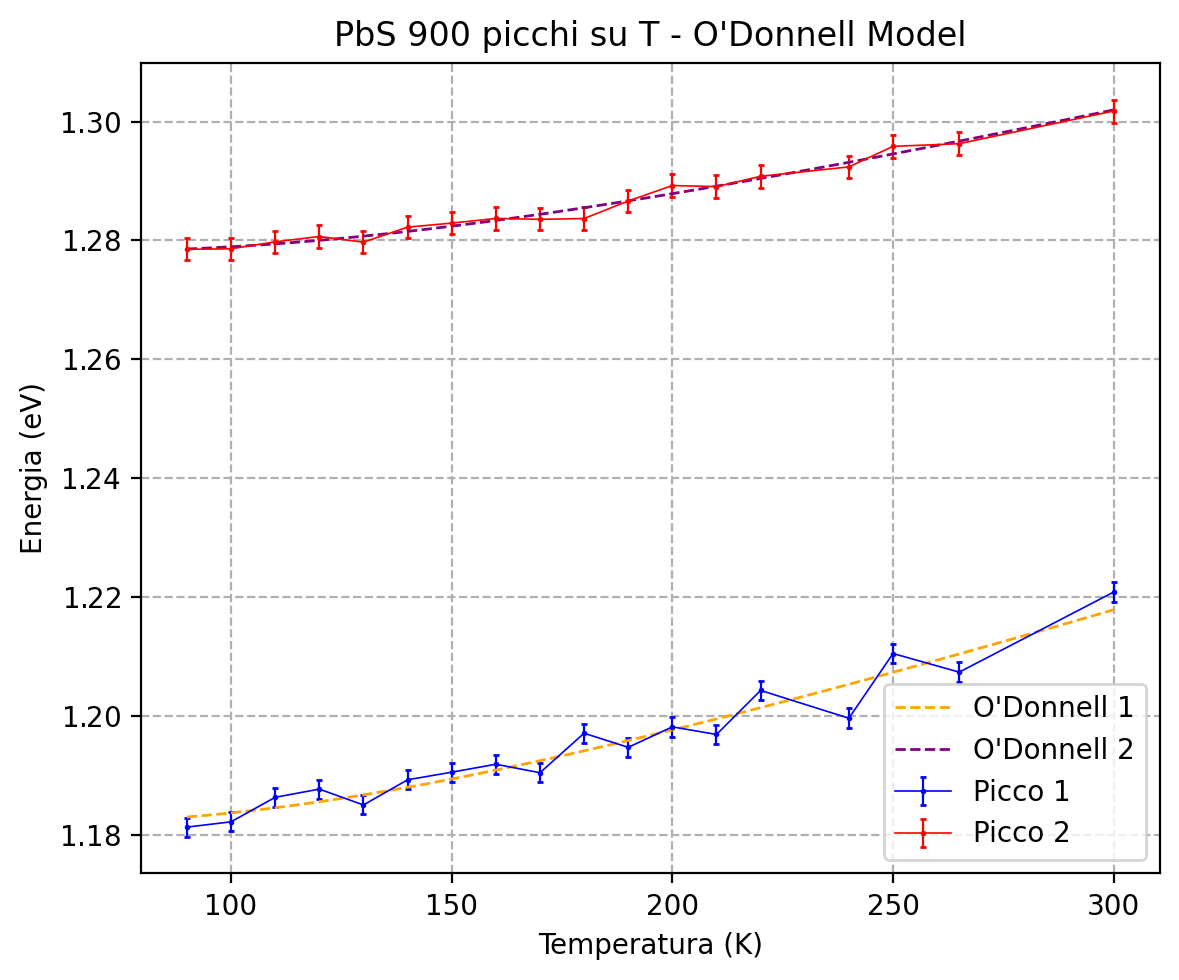

• O'Donnell 1
 - $E_0$ = 1.1817289551427927
 - $S$ = 1.4475256704127837
 - $E_{ph}$ = 0.033993246678849086
 - chi2rid = 2.7159366547629746
• O'Donnell 2
 - $E_0$ = 1.1960484458200695
 - $S$ = 1.0670340416692774
 - $E_{ph}$ = -0.038380896788154546
 - chi2rid = 0.20620233138822333


In [26]:
## PLOT ##

plt.figure(figsize=(6,5), dpi=200)
# serve errorbar 
err_mu = 1.4145357031249999
err_mu1, err_mu2 = err_mu, err_mu

# c'è da convertire!!!
err_mu1, err_mu2 = err_lambda_to_E(mu1, err_mu), err_lambda_to_E(mu2, err_mu)
mu1_ev, mu2_ev = lambda_to_E(mu1), lambda_to_E(mu2)


plt.errorbar(x, mu1_ev, yerr=err_mu1, linestyle='-', marker='o', markersize=1, elinewidth=0.8, capsize=1,
             color='b', label='Picco 1', linewidth=0.6)
plt.errorbar(x, mu2_ev, yerr=err_mu2, linestyle='-', marker='o', markersize=1, elinewidth=0.8, capsize=1,
             color='r', label='Picco 2', linewidth=0.6)

## O'DONNEL MODEL ## 
p0 = [1.2, 0.1, 0.1]
low = [-np.inf, -np.inf, -np.inf]
upp = [np.inf, np.inf, np.inf]
popt1, pcov1 = curve_fit(O_Donnell, x, mu1_ev, sigma=err_mu1, p0=p0, bounds=(low,upp), maxfev=20000)
popt2, pcov2 = curve_fit(O_Donnell, x, mu2_ev, sigma=err_mu2, p0=p0, bounds=(low,upp), maxfev=20000)

## PLOT CURVA FIT ##
x_plot = np.linspace(90, 300, 150)
y_plot1 = O_Donnell(x_plot, *popt1)
plt.plot(x_plot, y_plot1, linestyle='--', color='orange', label=f"O'Donnell 1", linewidth=1)#, zorder=2)
y_plot2 = O_Donnell(x_plot, *popt2)
plt.plot(x_plot, y_plot2, linestyle='--', color='purple', label=f"O'Donnell 2", linewidth=1)#, zorder=2)

## OPZIONI GRAFICHE ##
plt.title(r"PbS 900 picchi su T - O'Donnell Model")
plt.xlabel("Temperatura (K)")
#plt.ylabel("Picco (nm)")
plt.ylabel("Energia (eV)")
plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
plt.legend()
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

## CHI2 ##
chi2_1, dof_1 = chi2_function (O_Donnell, x, mu1_ev, err_y=err_mu1, popt=popt1)
chi2_2, dof_2 = chi2_function (O_Donnell, x, mu2_ev, err_y=err_mu2, popt=popt2)

## PRINT RISULTATI FIT ##
print("• O'Donnell 1")
print(r' - $E_0$ =', popt1[0])
print(r' - $S$ =', popt1[1])
print(r' - $E_{ph}$ =', popt1[2])
print(' - chi2rid =', chi2_1/dof_1)
print("• O'Donnell 2")
print(r' - $E_0$ =', popt2[0])
print(r' - $S$ =', popt2[1])
print(r' - $E_{ph}$ =', popt2[2])
print(' - chi2rid =', chi2_2/dof_2)

# Ci sarebbe da provare anche EXPONENTIAL GROWTH MODEL

/Users/zosojack/lab-ss/QP2/qp2_subroutines.py:20: RuntimeWarning: overflow encountered in exp
  return E_0 - a*(np.exp(-b*T)-1)


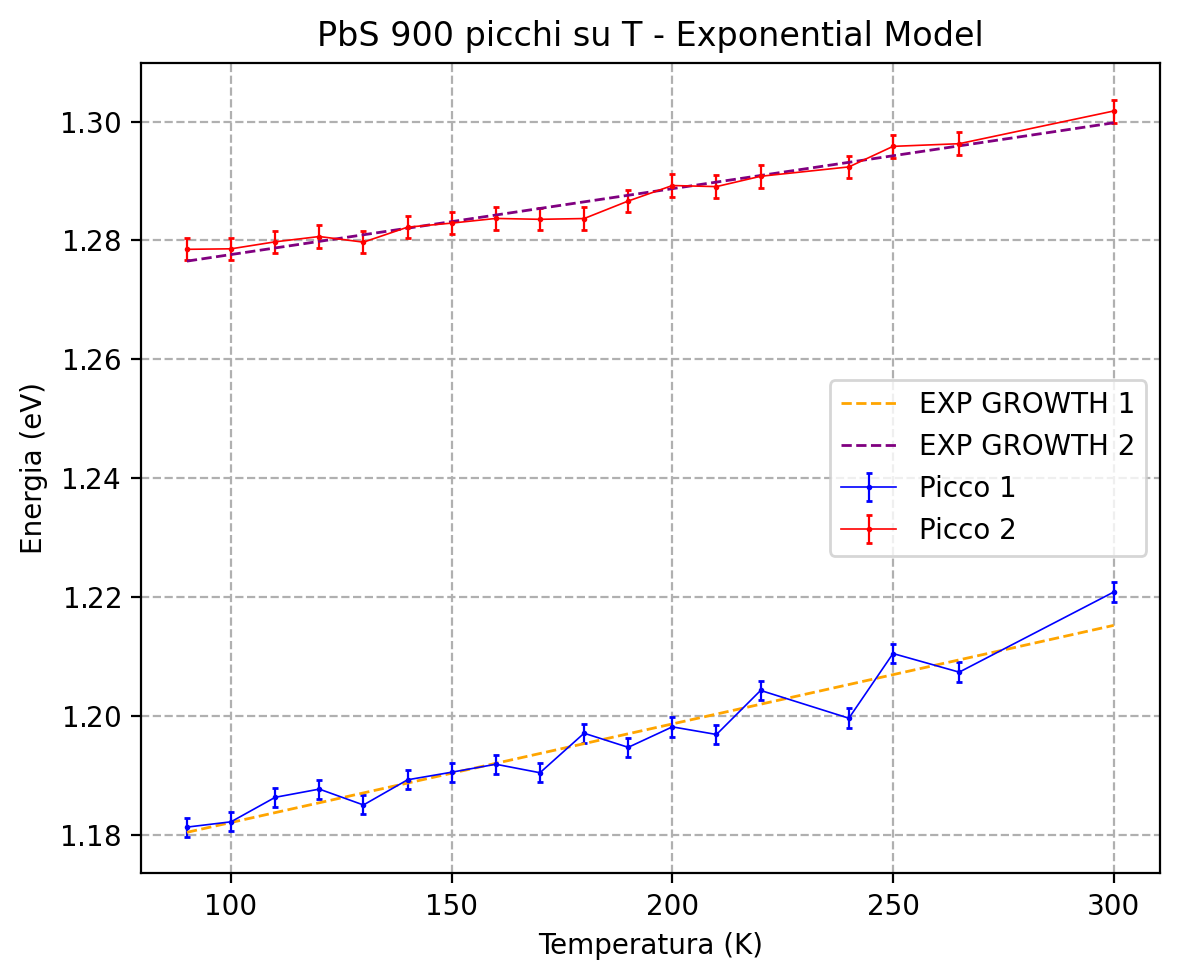

• EXP GROWTH 1
 - $E_0$ = 1.1654760600355016
 - $a$ = 156.97155365627006
 - $b$ = 1.0565173821988705e-06
 - chi2rid = 3.2745306655384283
• EXP GROWTH 2
 - $E_0$ = 1.2665321894307848
 - $a$ = 135.7601771725781
 - $b$ = 8.164523533844516e-07
 - chi2rid = 0.5385178791139275


In [27]:
## PLOT ##

plt.figure(figsize=(6,5), dpi=200)
# serve errorbar 
err_mu = 1.4145357031249999
err_mu1, err_mu2 = err_mu, err_mu

# c'è da convertire!!!
err_mu1, err_mu2 = err_lambda_to_E(mu1, err_mu), err_lambda_to_E(mu2, err_mu)
mu1_ev, mu2_ev = lambda_to_E(mu1), lambda_to_E(mu2)


plt.errorbar(x, mu1_ev, yerr=err_mu1, linestyle='-', marker='o', markersize=1, elinewidth=0.8, capsize=1,
             color='b', label='Picco 1', linewidth=0.6)
plt.errorbar(x, mu2_ev, yerr=err_mu2, linestyle='-', marker='o', markersize=1, elinewidth=0.8, capsize=1,
             color='r', label='Picco 2', linewidth=0.6)

## EXPONENTIAL GROWTH MODEL ## 
p0 = [1.2, 0.1, 0.1]
low = [-np.inf, -np.inf, -np.inf]
upp = [np.inf, np.inf, np.inf]
popt1, pcov1 = curve_fit(exp_growth_model, x, mu1_ev, sigma=err_mu1, p0=p0, bounds=(low,upp), maxfev=20000)
popt2, pcov2 = curve_fit(exp_growth_model, x, mu2_ev, sigma=err_mu2, p0=p0, bounds=(low,upp), maxfev=20000)

## PLOT CURVA FIT ##
x_plot = np.linspace(90, 300, 150)
y_plot1 = exp_growth_model(x_plot, *popt1)
plt.plot(x_plot, y_plot1, linestyle='--', color='orange', label=f"EXP GROWTH 1", linewidth=1)#, zorder=2)
y_plot2 = exp_growth_model(x_plot, *popt2)
plt.plot(x_plot, y_plot2, linestyle='--', color='purple', label=f"EXP GROWTH 2", linewidth=1)#, zorder=2)

## OPZIONI GRAFICHE ##
plt.title(r"PbS 900 picchi su T - Exponential Model")
plt.xlabel("Temperatura (K)")
#plt.ylabel("Picco (nm)")
plt.ylabel("Energia (eV)")
plt.ticklabel_format(axis='y',style='scientific', useMathText=True, scilimits=(0,0) )
plt.legend()
plt.grid(linestyle='--')
plt.tight_layout()
plt.show()

## CHI2 ##
chi2_1, dof_1 = chi2_function (exp_growth_model, x, mu1_ev, err_y=err_mu1, popt=popt1)
chi2_2, dof_2 = chi2_function (exp_growth_model, x, mu2_ev, err_y=err_mu2, popt=popt2)

## PRINT RISULTATI FIT ##
print("• EXP GROWTH 1")
print(r' - $E_0$ =', popt1[0])
print(r' - $a$ =', popt1[1])
print(r' - $b$ =', popt1[2])
print(' - chi2rid =', chi2_1/dof_1)
print("• EXP GROWTH 2")
print(r' - $E_0$ =', popt2[0])
print(r' - $a$ =', popt2[1])
print(r' - $b$ =', popt2[2])
print(' - chi2rid =', chi2_2/dof_2)